<a href="https://colab.research.google.com/github/Tamaghnatech/TItanicPredict/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


##Importing Data

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')


In [5]:
# Display the first few rows of the train dataset
print("Train Data:")
print(train_data.head())

# Display the information about columns, data types, and non-null values
print("\nTrain Data Info:")
print(train_data.info())

# Display summary statistics of numerical columns
print("\nTrain Data Summary Statistics:")
print(train_data.describe())

# Display the first few rows of the test dataset
print("\nTest Data:")
print(test_data.head())

# Display the information about columns, data types, and non-null values in the test dataset
print("\nTest Data Info:")
print(test_data.info())

# Display summary statistics of numerical columns in the test dataset
print("\nTest Data Summary Statistics:")
print(test_data.describe())

# Display the first few rows of the submission dataset
print("\nSubmission Data:")
print(submission_data.head())

# Display the information about columns, data types, and non-null values in the submission dataset
print("\nSubmission Data Info:")
print(submission_data.info())

# Display summary statistics of numerical columns in the submission dataset
print("\nSubmission Data Summary Statistics:")
print(submission_data.describe())


Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

##Basic Visualization

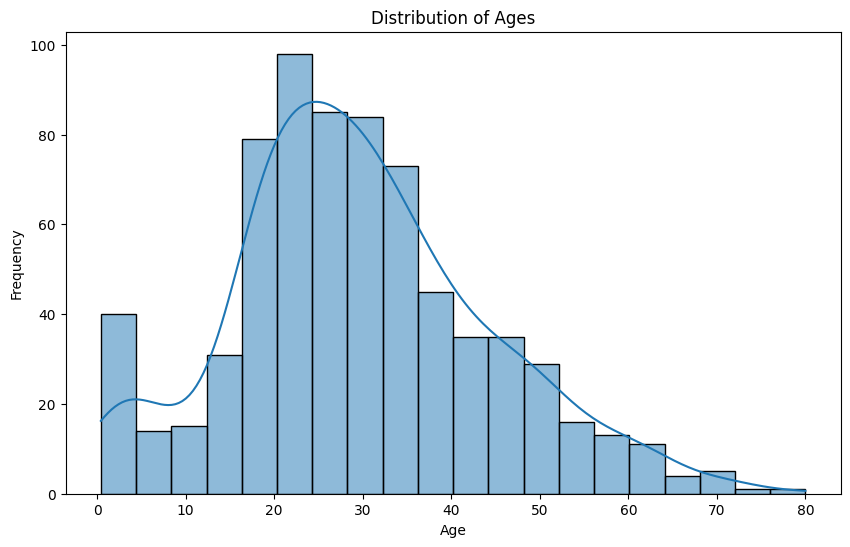

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()


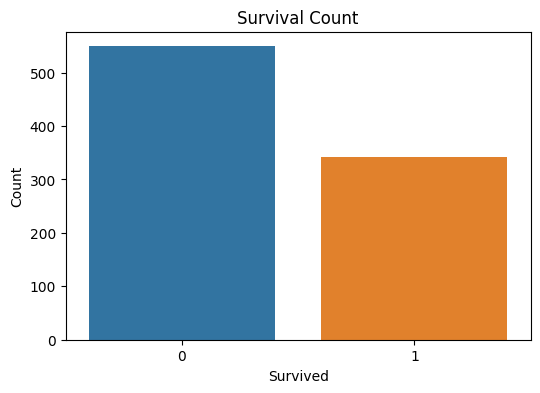

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()


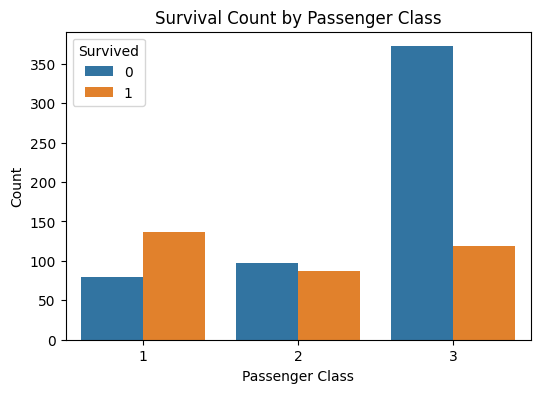

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.show()


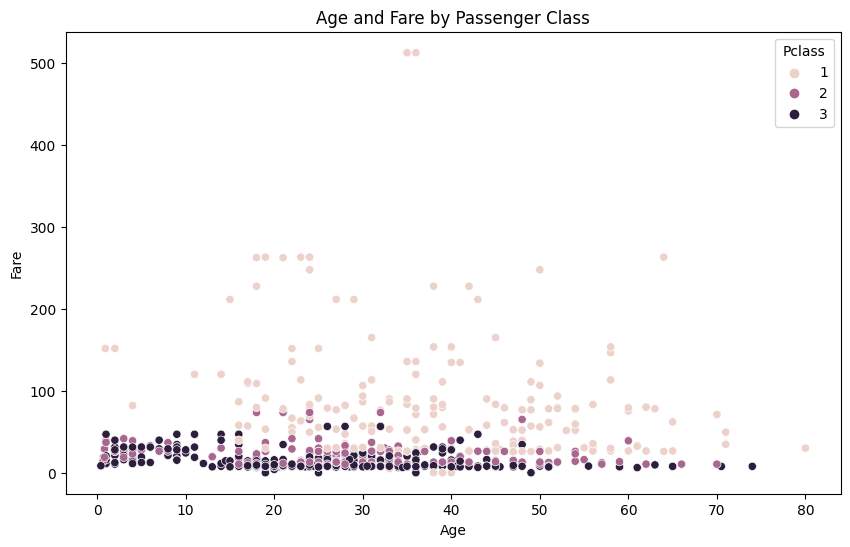

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age and Fare by Passenger Class')
plt.show()


<ipython-input-11-fd70accb1201>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


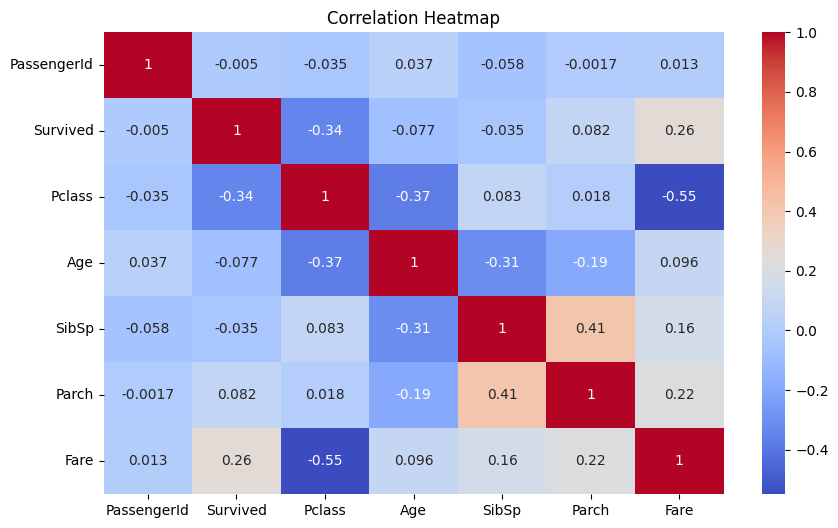

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##Data Preprocessing

In [12]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [13]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])


In [15]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X_train = train_data[features]
y_train = train_data['Survived']

X_test = test_data[features]


In [16]:
from sklearn.model_selection import train_test_split

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [19]:

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train_train, y_train_train)
    y_pred = classifier.predict(X_train_val)
    accuracy = accuracy_score(y_train_val, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.82
Support Vector Machine Accuracy: 0.82
K-Nearest Neighbors Accuracy: 0.82
Logistic Regression Accuracy: 0.81


In [21]:

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train_train, y_train_train)

# Predict on the validation set
y_pred = random_forest.predict(X_train_val)

# Calculate accuracy
accuracy = accuracy_score(y_train_val, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.82


Iteration 1: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 2: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 3: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 4: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 5: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 6: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 7: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 8: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 9: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 10: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 11: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 12: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 13: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 14: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 15: Train Accuracy = 0.98, Validation Accuracy = 0.82
Iteration 16: Train Accuracy = 0.98, Validation A

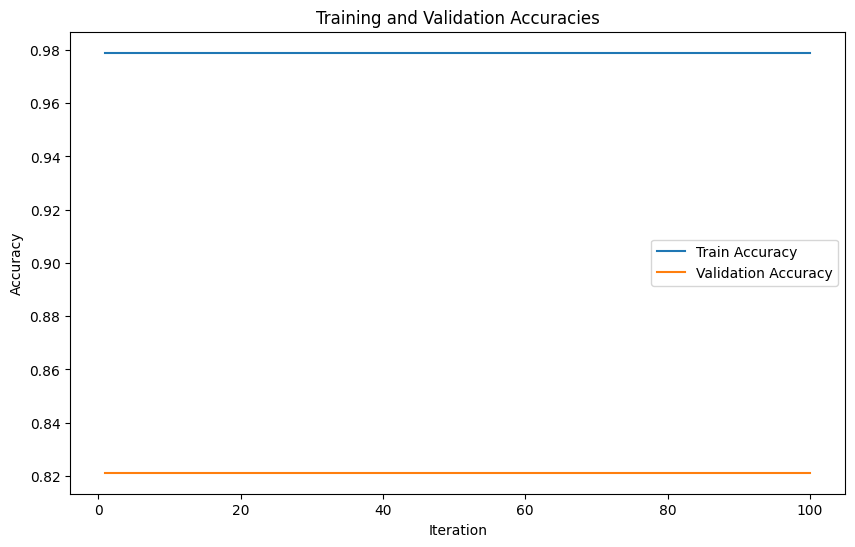

In [22]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Train the classifier on the training data and track accuracies
for i in range(1, 101):  # Train for 100 iterations
    random_forest.fit(X_train_train, y_train_train)

    # Predict on training and validation sets
    y_train_pred = random_forest.predict(X_train_train)
    y_val_pred = random_forest.predict(X_train_val)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train_train, y_train_pred)
    val_accuracy = accuracy_score(y_train_val, y_val_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Iteration {i}: Train Accuracy = {train_accuracy:.2f}, Validation Accuracy = {val_accuracy:.2f}")

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 101), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict on validation set
y_pred = random_forest.predict(X_train_val)

# Calculate precision, recall, and F1-score
precision = precision_score(y_train_val, y_pred)
recall = recall_score(y_train_val, y_pred)
f1 = f1_score(y_train_val, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train_val, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.80
Recall: 0.76
F1-Score: 0.78
Confusion Matrix:
[[91 14]
 [18 56]]


In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_train, y_train_train)

# Get best parameters and best estimator
best_params = grid_search.best_params_
best_random_forest = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [26]:
# Predict on the test set
test_predictions = best_random_forest.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})

# Save submission to a CSV file
submission.to_csv('submission_random_forest.csv', index=False)


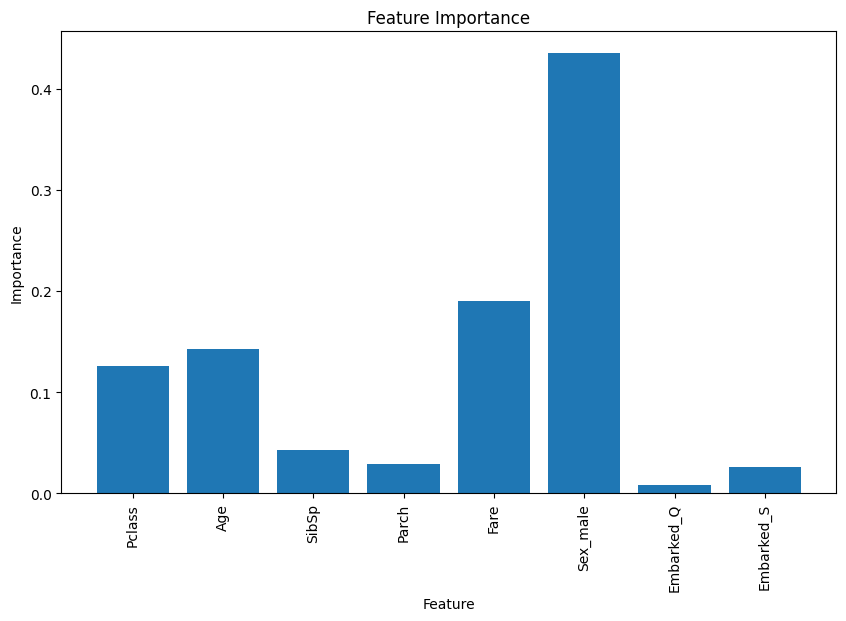

In [27]:
# Get feature importances
feature_importances = best_random_forest.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_train_train.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_random_forest, X_train_train, y_train_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.84615385 0.83916084 0.84507042 0.78873239 0.84507042]
Mean CV Score: 0.832837584950261


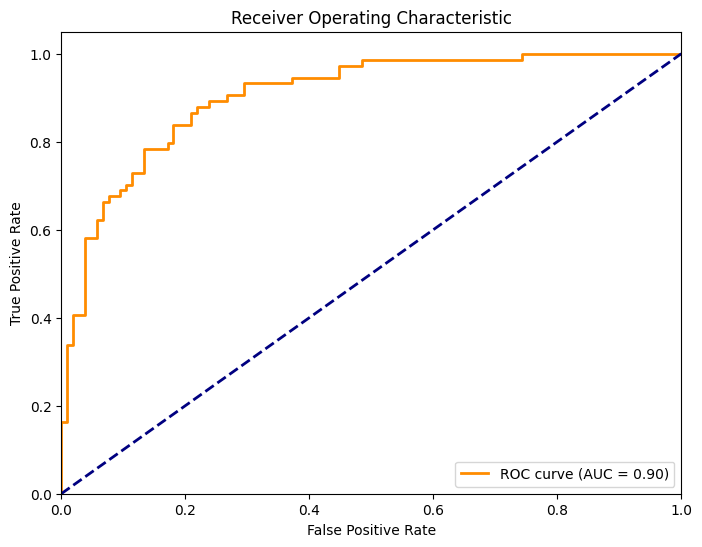

In [29]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_probs = best_random_forest.predict_proba(X_train_val)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


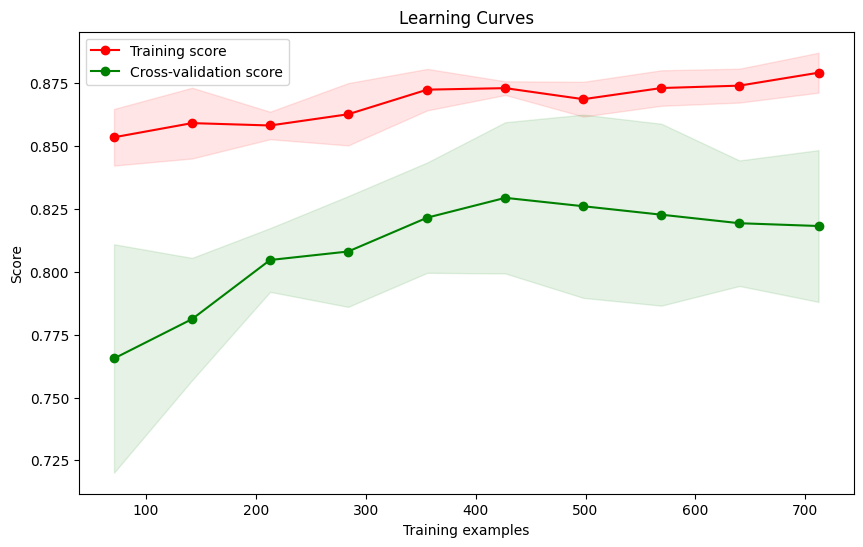

In [34]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(best_random_forest, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()


In [43]:
submission.to_csv('/content/submission.csv', index=False)
